In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [2]:
# Set folder path
folder_path =  '/users/mmotuz/Documents/GBO_REU/GOALS/'

df1 = pd.read_csv(folder_path + 'INputDAT.csv', skiprows = 1)
df2 = pd.read_csv(folder_path + 'KEEP_tab1.csv', header=None)
df2.columns = ['Name', 'RA', 'DEC', 'Velocity', '4']

df3 = pd.read_csv(folder_path + "goals_v3.dat", skiprows=28, delim_whitespace=True)
df3.columns = [
    "src_name",
    "fit_mode",
    "observed_optical_velocity",
    "integration_time_min",
    "line_jy_kms_stats",
    "peak_mjy",
    "ch1",
    "ch2",
    "continuum_level_jy",
    "rms_mjy_7ch",
    "line_jy_kms_50pct",
    "line_error_50pct",
    "line_width_50pct",
    "line_width_error_50pct",
    "center_velocity_50pct",
    "center_velocity_error_50pct",
    "line_jy_kms_20pct",
    "line_error_20pct",
    "line_width_20pct",
    "line_width_error_20pct",
    "center_velocity_20pct",
    "center_velocity_error_20pct"
]

df4 = pd.read_csv(folder_path + "tab1.csv")

# Drop the last row
df3 = df3.iloc[:-1]

df1


#galaxies1 = set(df3.iloc[:, 0])
#galaxies2 = set(df2.iloc[:, 0])

#missing_in_file2 = galaxies1 - galaxies2
#missing_in_file1 = galaxies2 - galaxies1

#print("Galaxies in file1 but missing in file2:", missing_in_file2)
#print("Galaxies in file2 but missing in file1:", missing_in_file1)

/tmp/ipykernel_77901/2978932434.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df3 = pd.read_csv(folder_path + "goals_v3.dat", skiprows=28, delim_whitespace=True)


,nan,Mpc,Lsun,nan.1,nan.2,Jykm/s,nan.3,cz,km/s,km/s.1,mJy
0,F00073+2538,65.2,11.12,F00073+2538,1,=9.04,0.10,4567.0,387.2,453.1,1.95
1,F00085-1223,84.1,11.49,F00085-1223,1,=4.48,0.09,5881.0,298.3,432.4,2.08
2,F00163-1039,117.5,11.48,F00163-1039,1,=5.95,0.08,8143.0,264.6,309.5,1.96
3,F00344-3349,89.0,11.28,F00344-3349,2,=0.13,0.05,6238.0,90.6,147.9,1.63
4,F00402-2349,95.2,11.44,F00402-2349,1,=2.01,0.07,6762.0,261.1,329.6,1.68
...,...,...,...,...,...,...,...,...,...,...,...
156,F23394-0353,100.0,11.27,F23394-0353,1,=10.95,0.11,6932.0,254.4,400.0,1.90
157,F23436+5257,149.0,11.57,F23436+5257,1,=1.15,0.05,10248.0,161.7,241.6,1.07
158,F23444+2911,73.6,11.07,F23444+2911,1,=26.90,0.16,5144.0,378.9,431.1,2.93
159,F23488+1949,61.2,11.40,F23488+1949,1,=18.82,0.13,4299.0,472.7,617.4,2.23


/tmp/ipykernel_77901/1359218859.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=3, header=None)
/tmp/ipykernel_77901/1359218859.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=3, header=None)
/tmp/ipykernel_77901/1359218859.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=3, header=None)
/tmp/ipykernel_77901/1359218859.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path, delim_whitespace=True, skiprows=

162


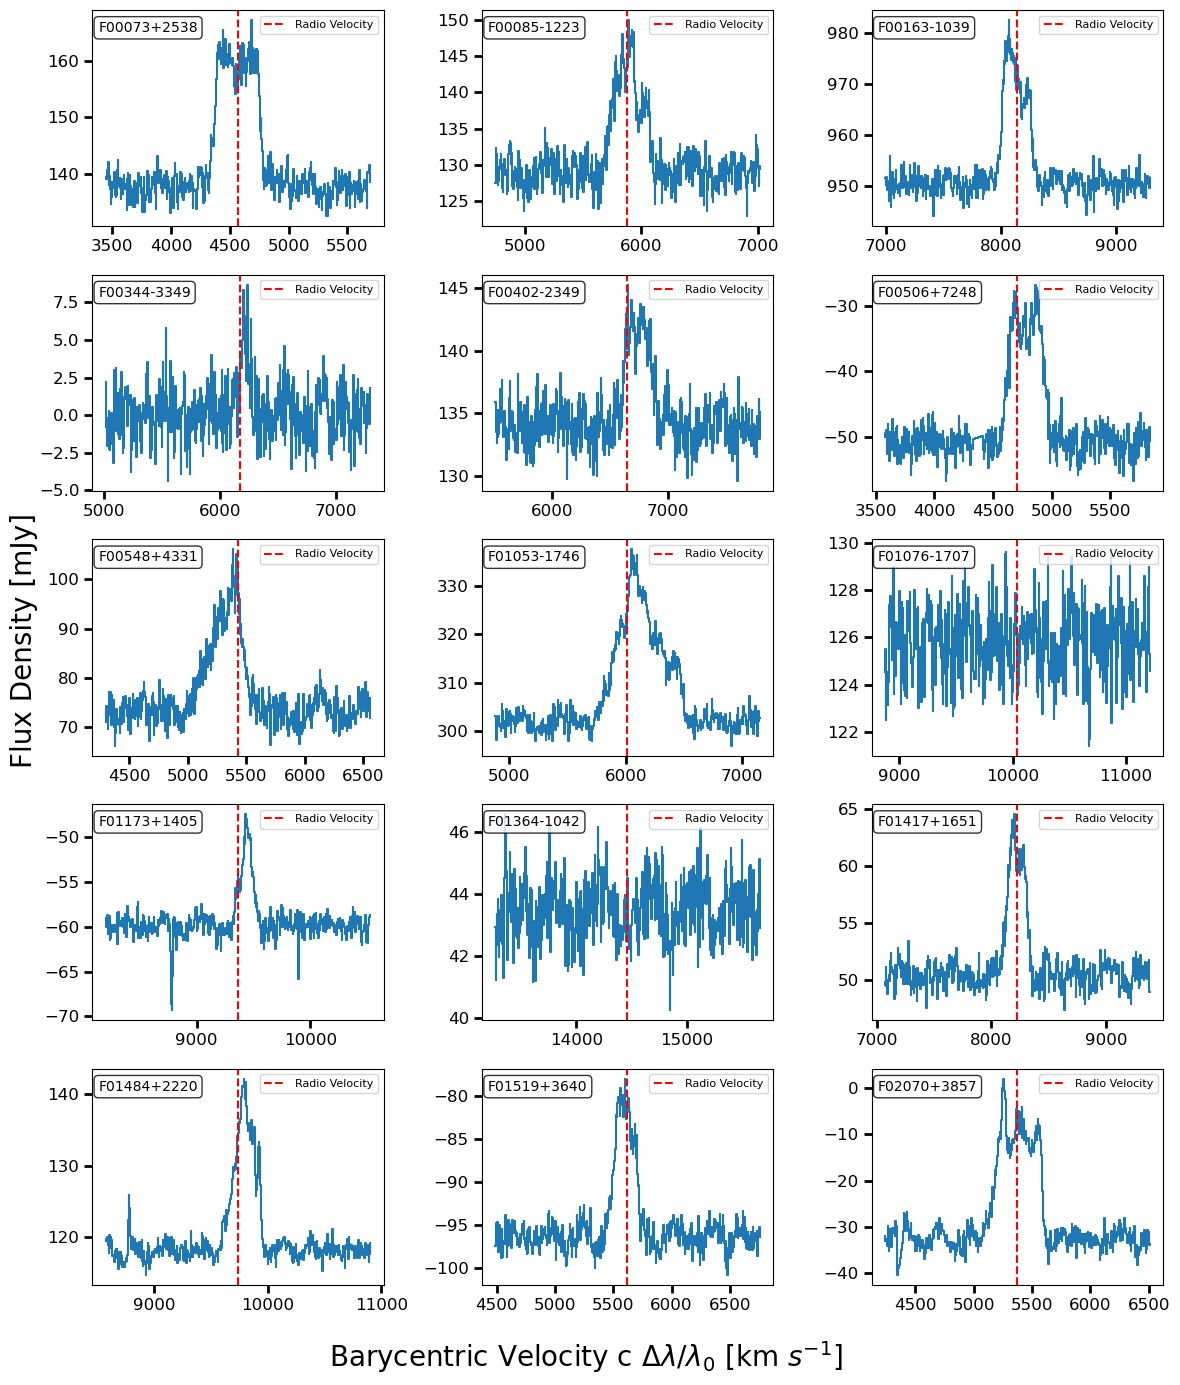

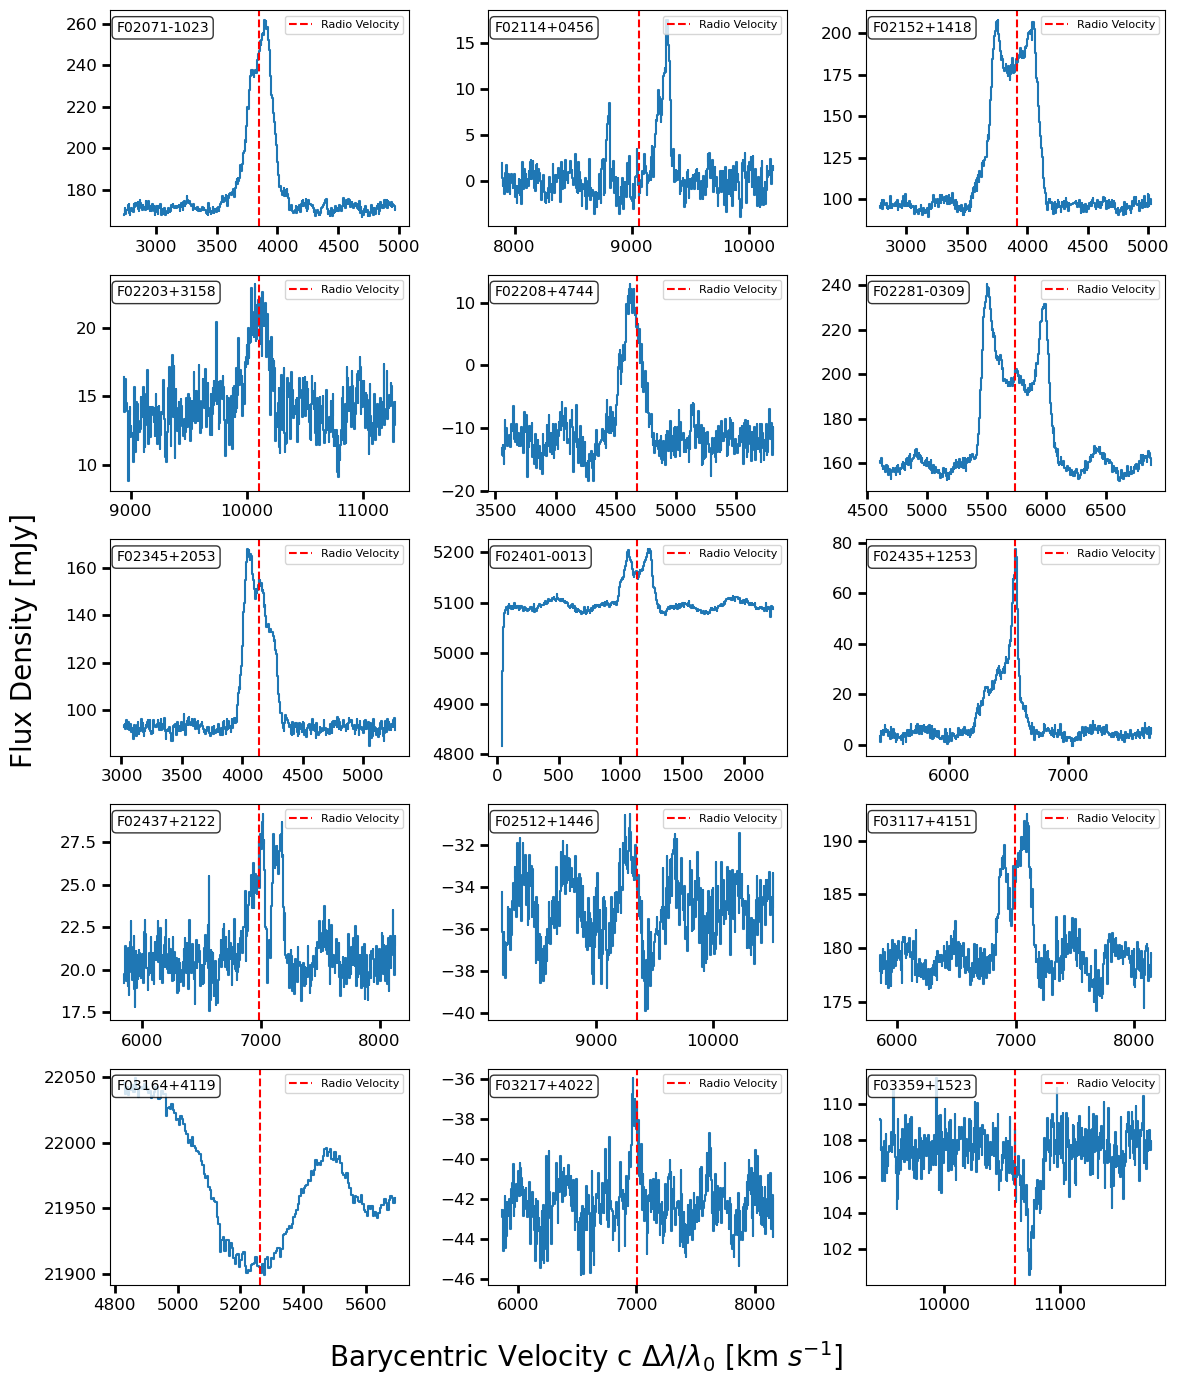

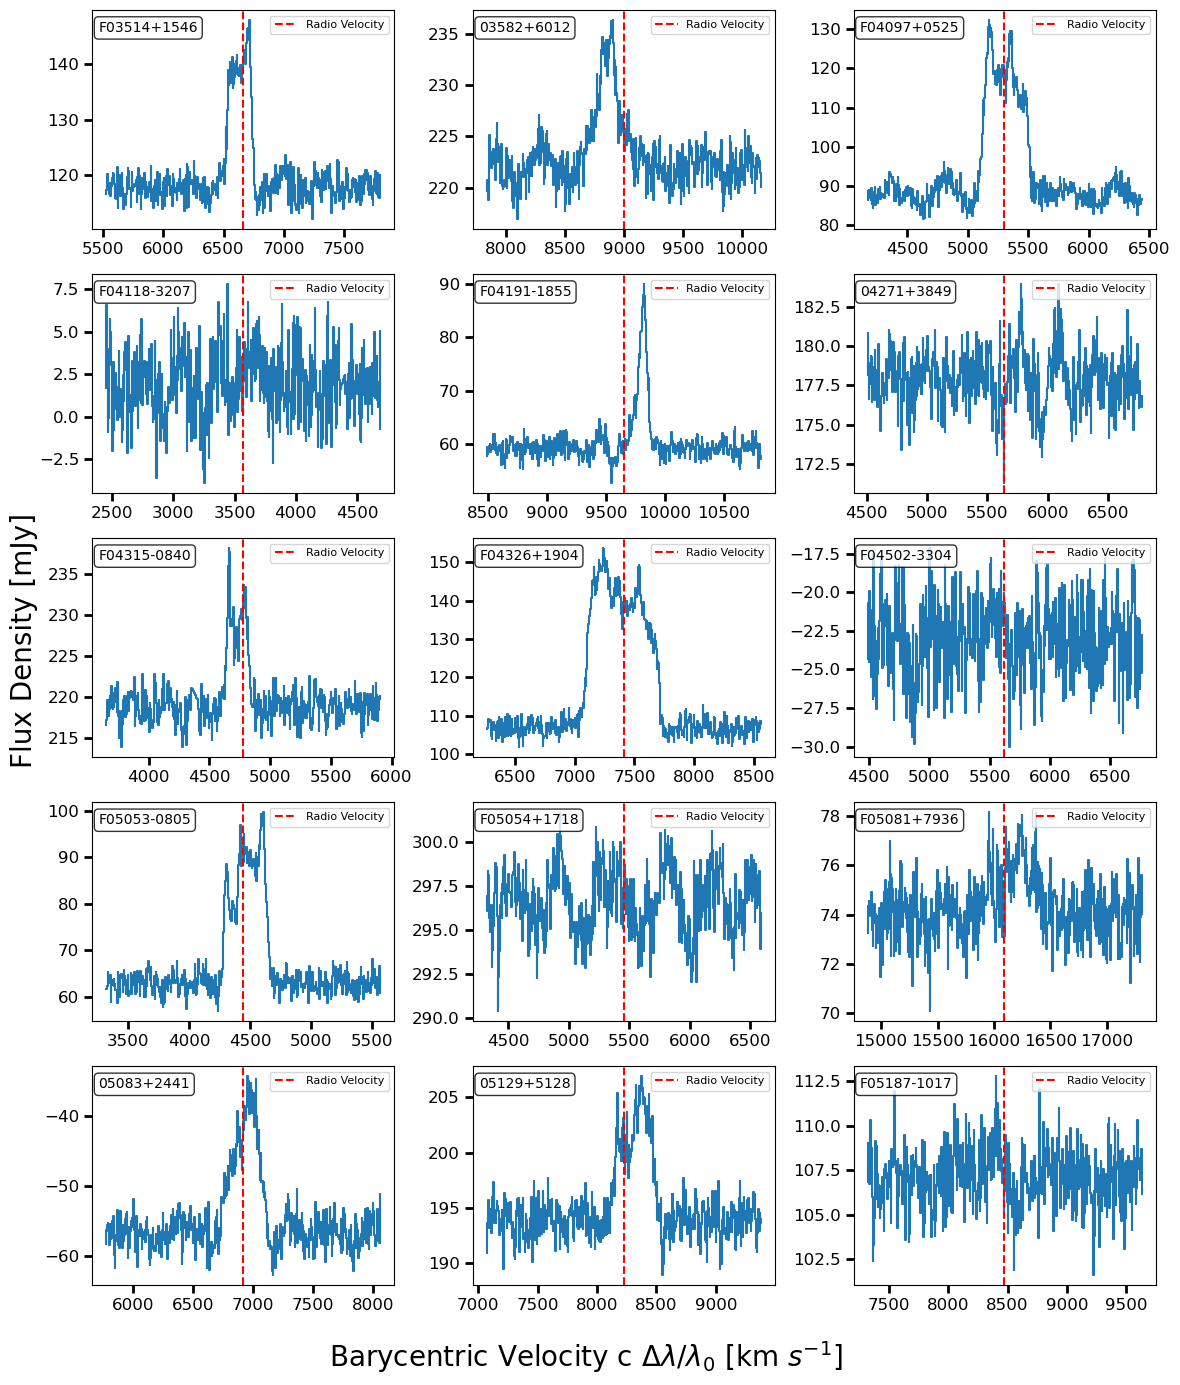

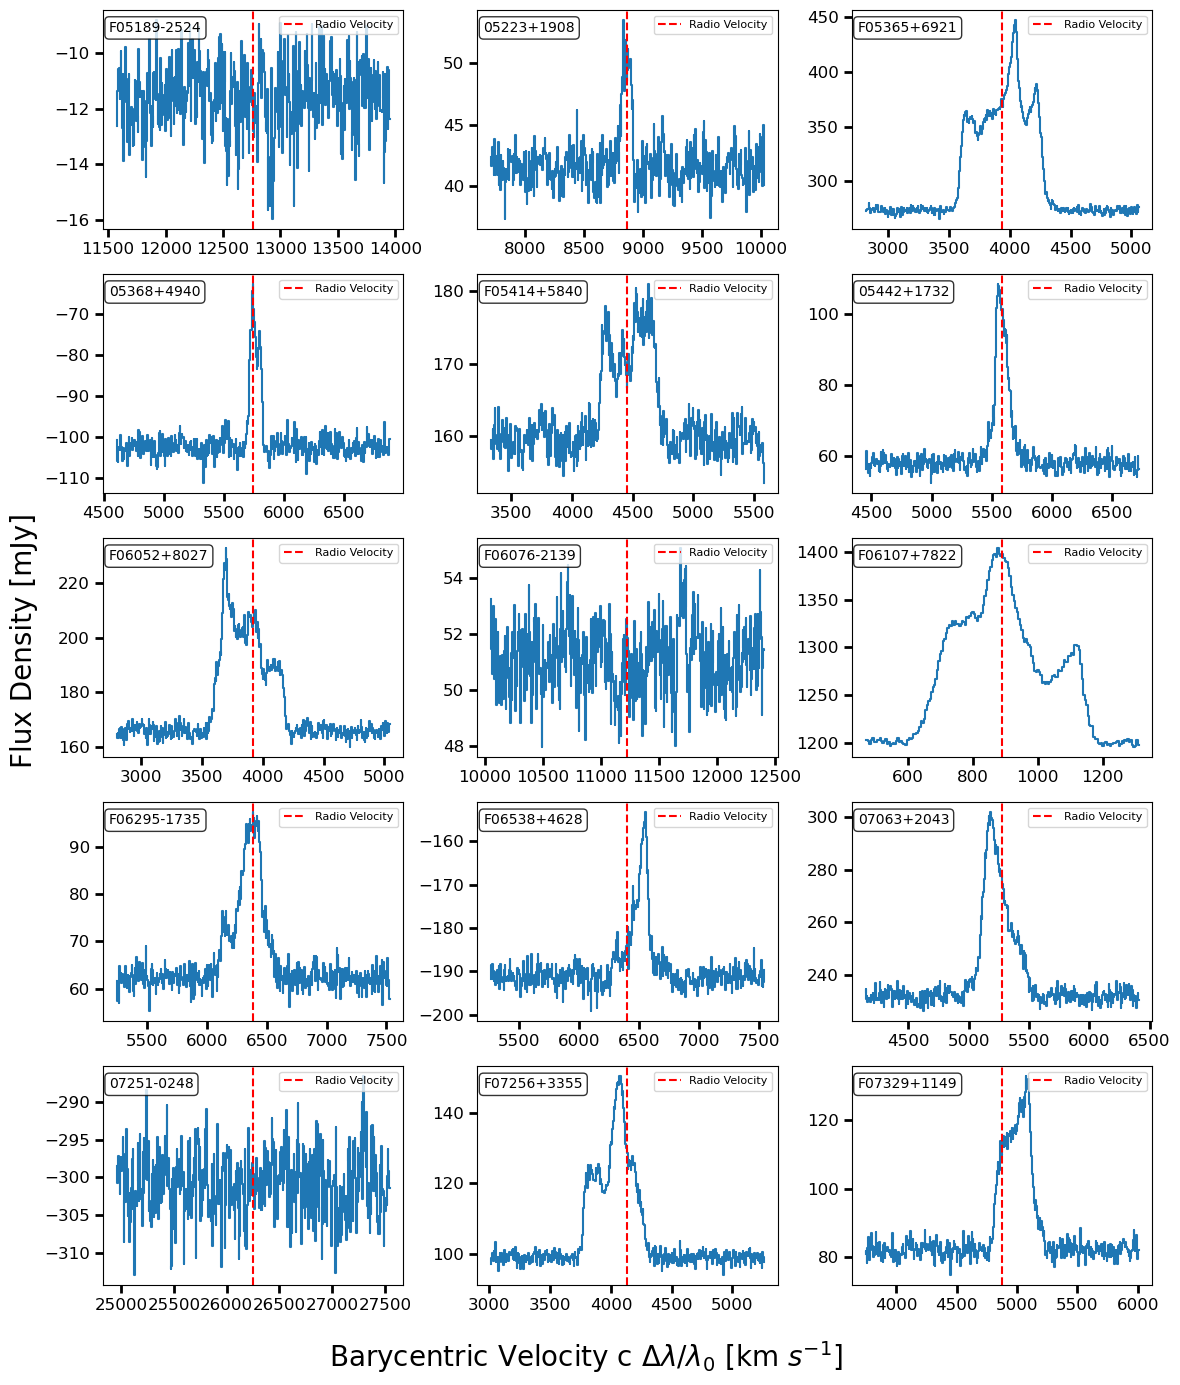

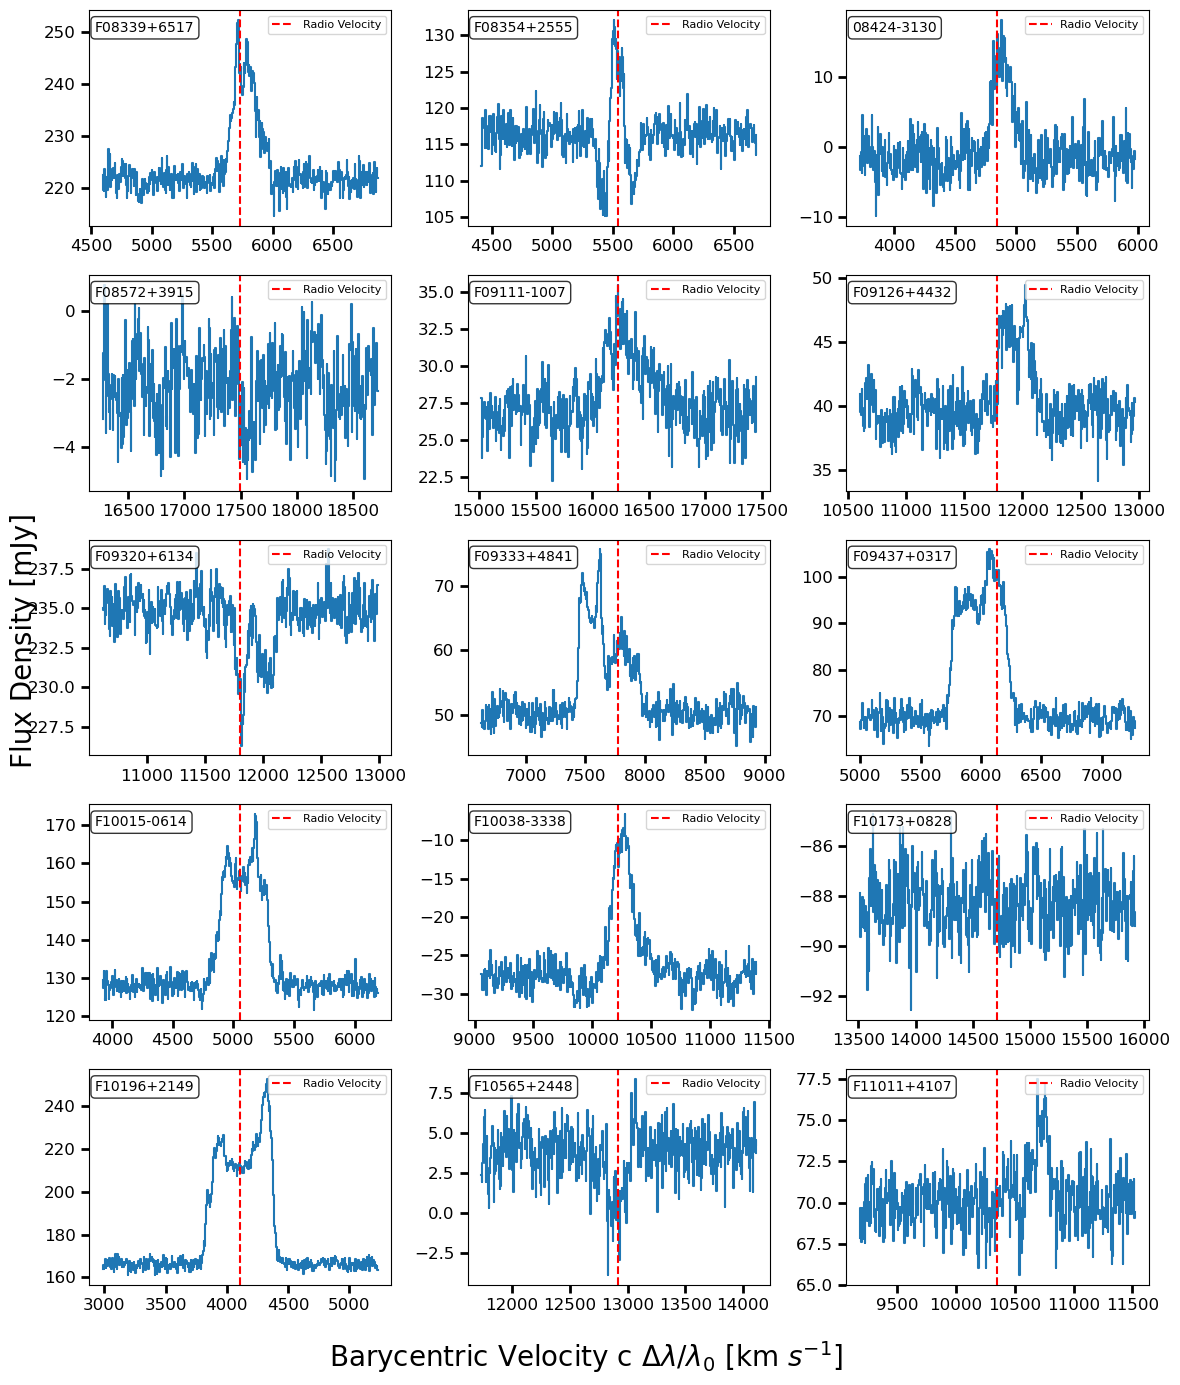

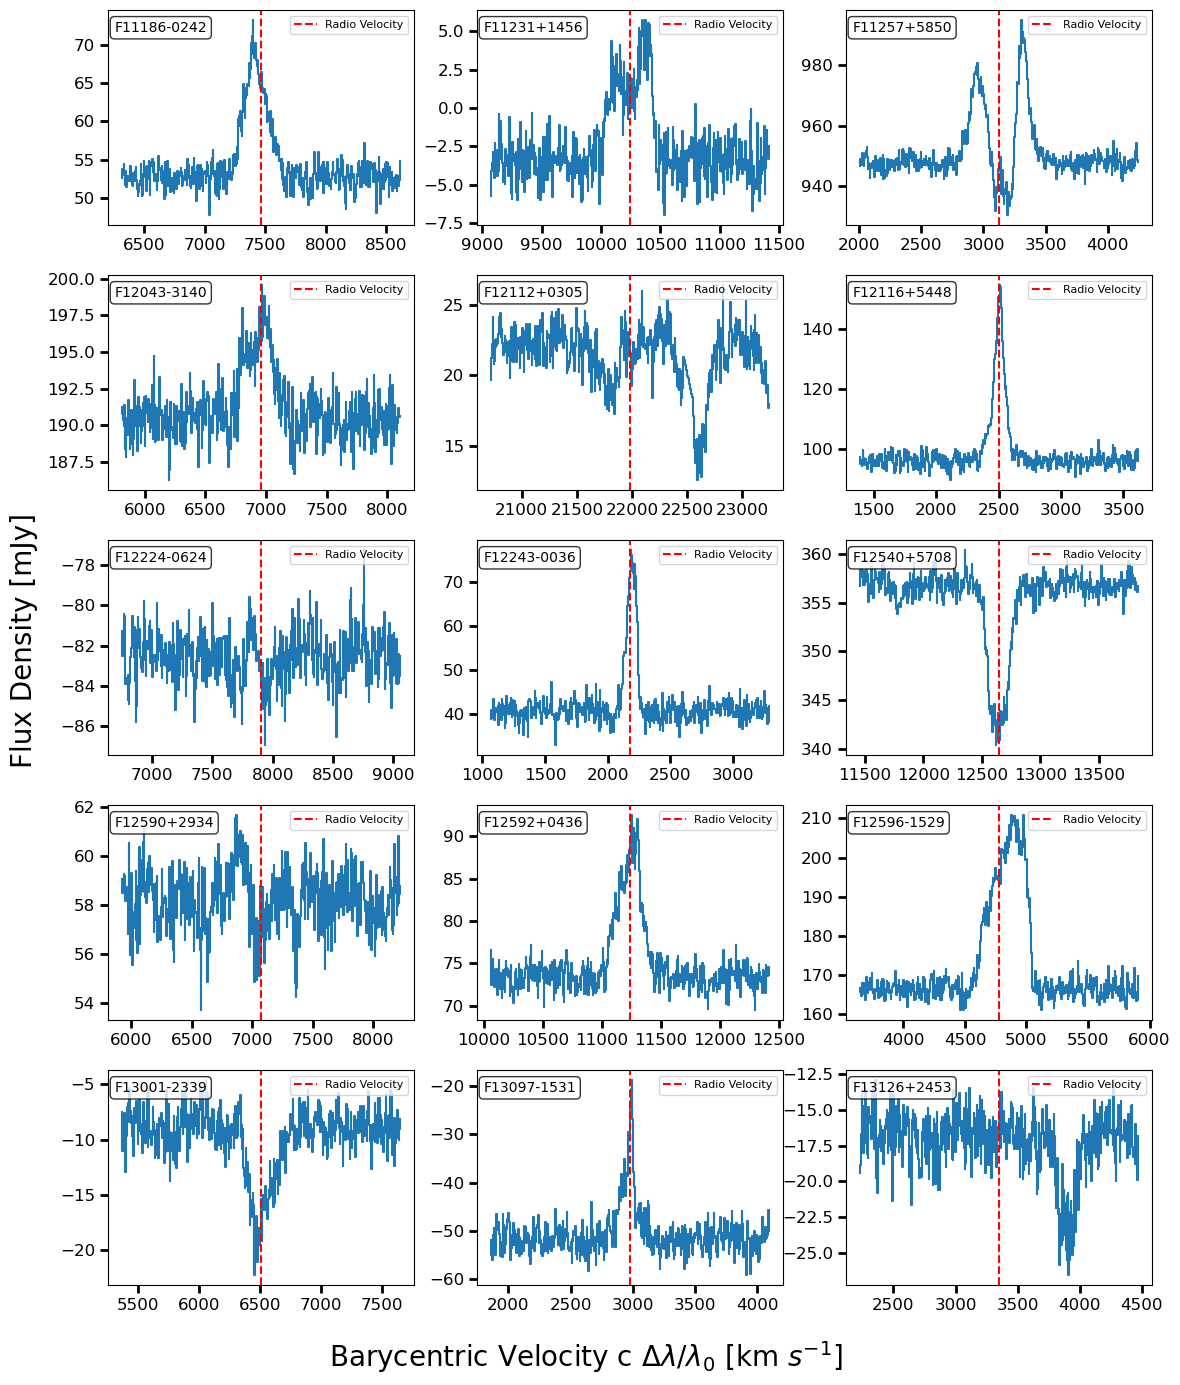

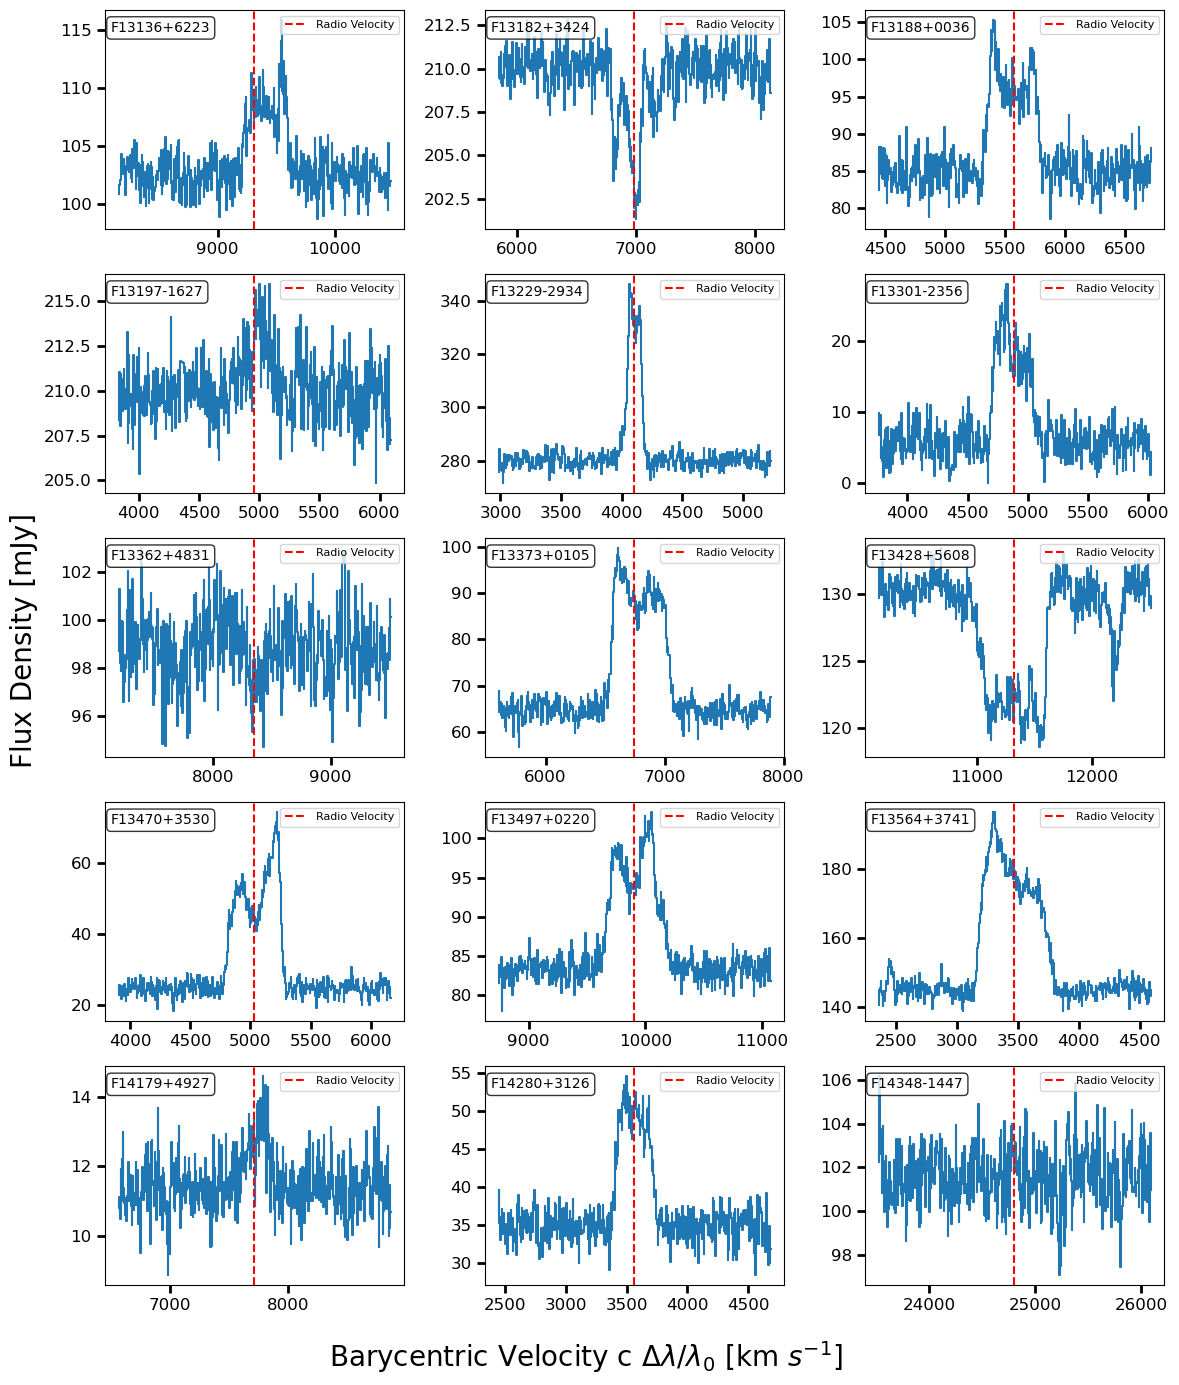

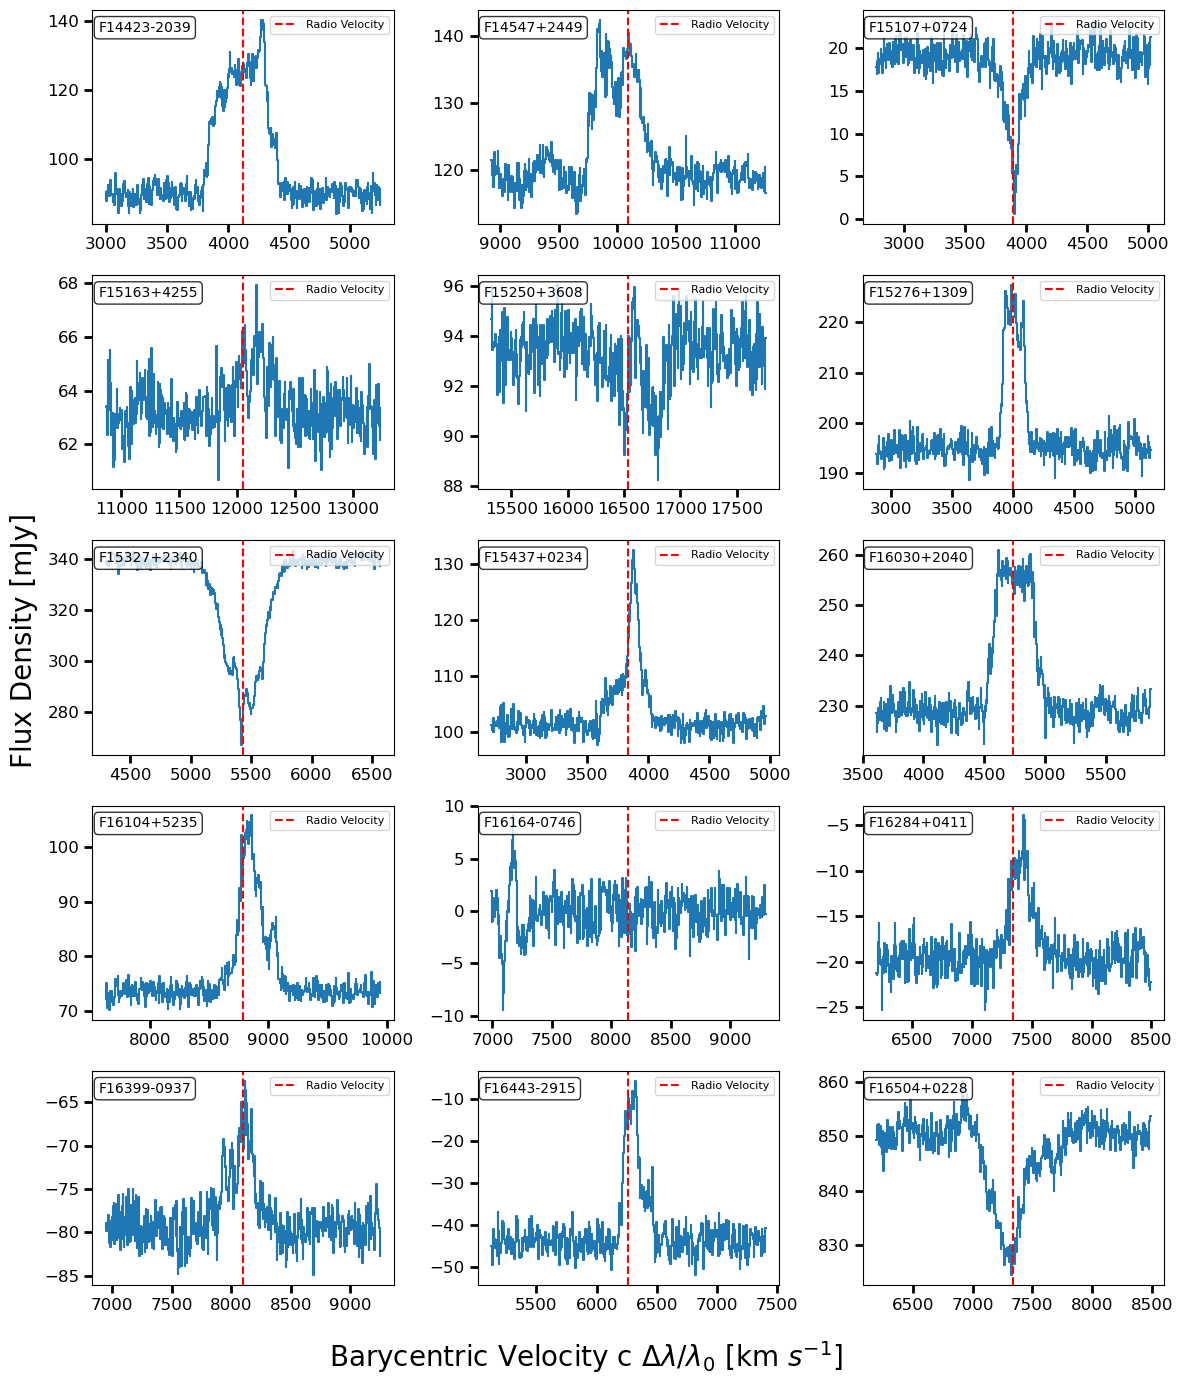

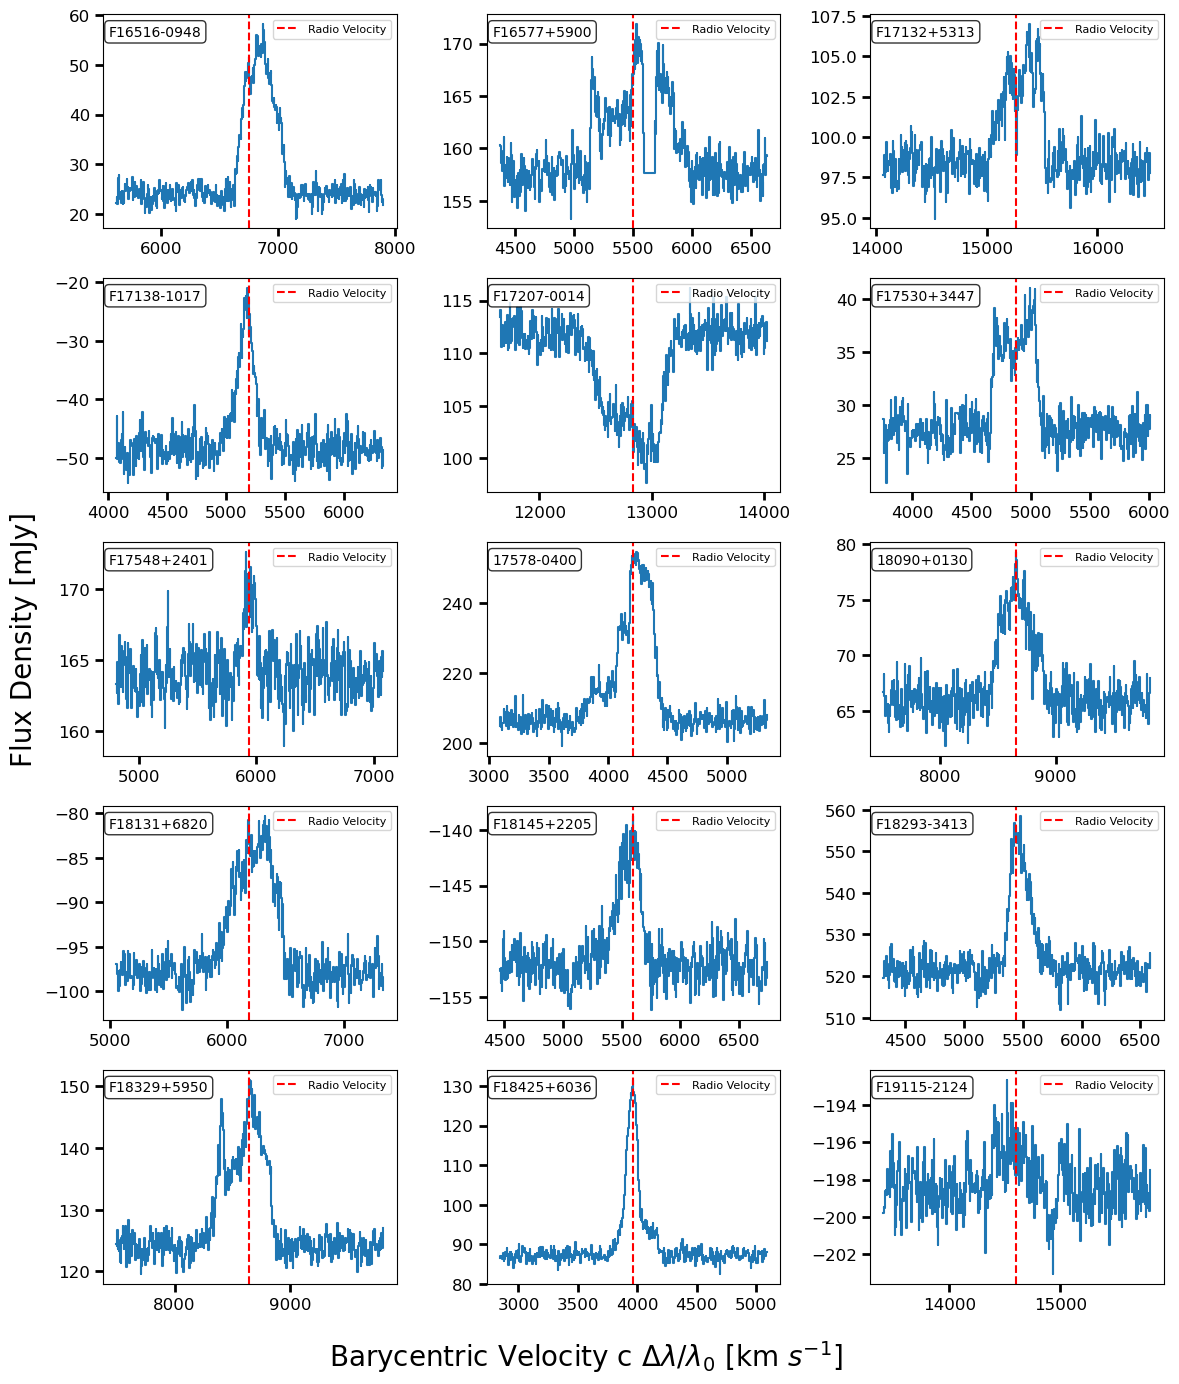

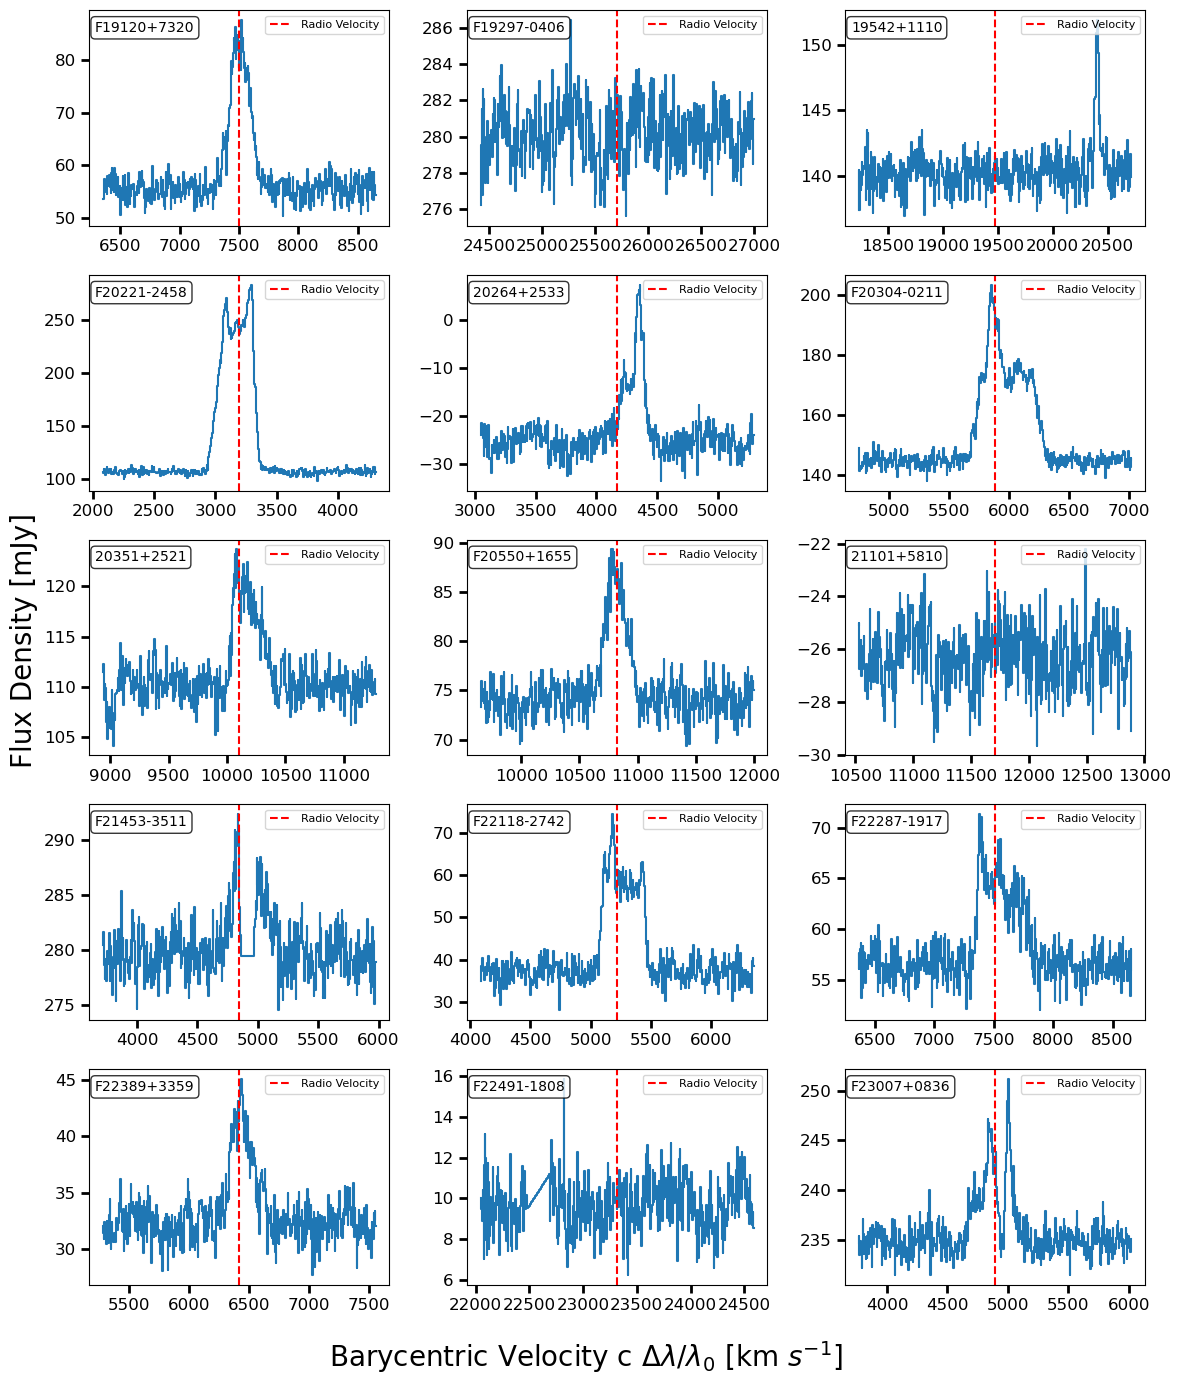

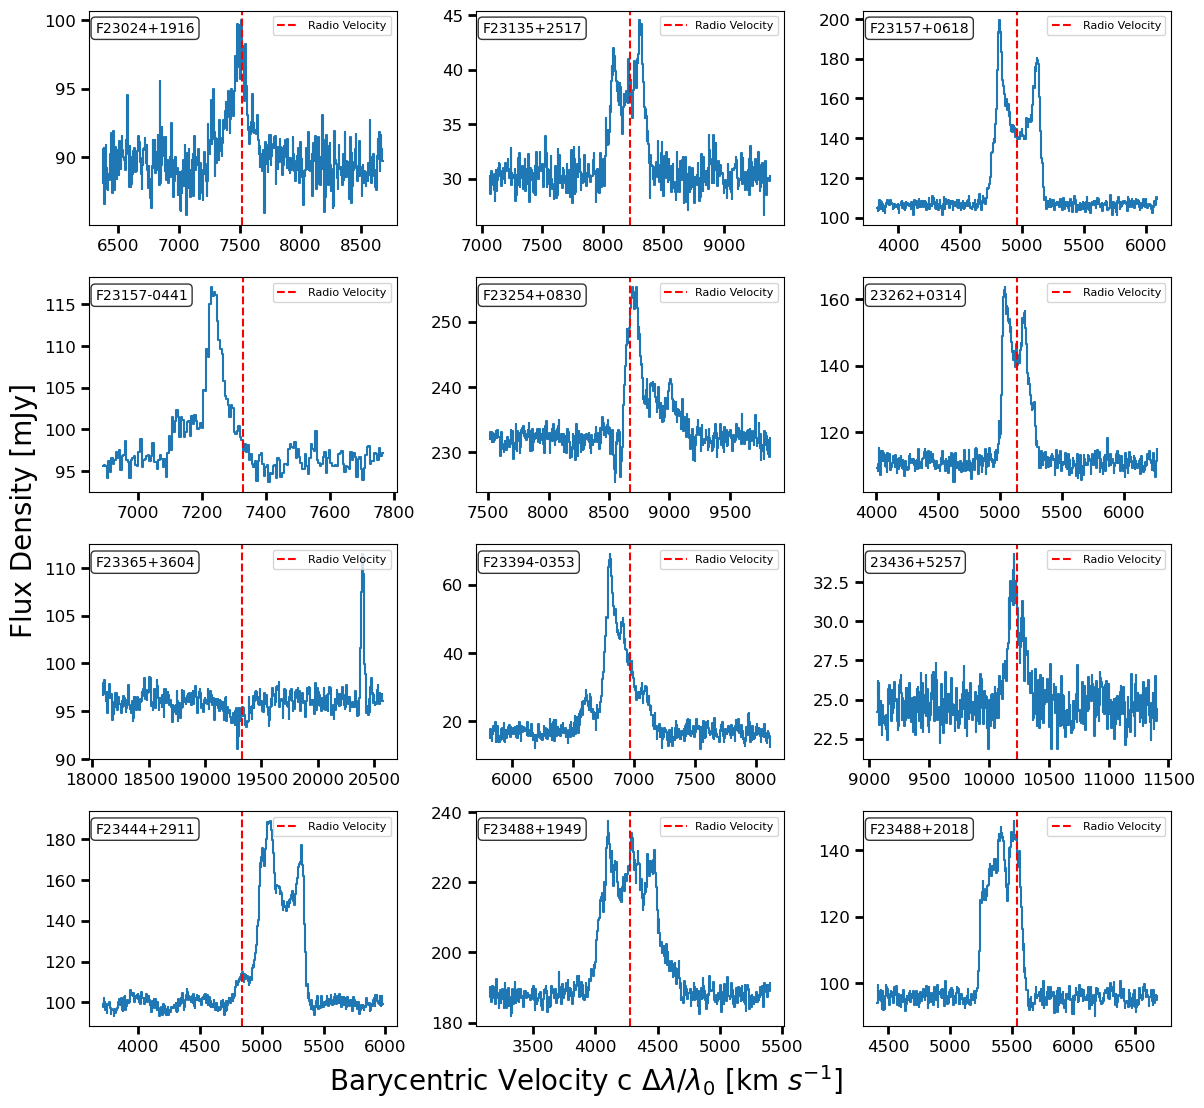

In [3]:
# Collect valid .txt files
txt_files = sorted([f for f in os.listdir(folder_path + 'DATAv2') if f.endswith('.txt')])
valid_files = []
valid_data = []
name = []
# Load and filter valid 2-column txts
for filename in txt_files:
    path = os.path.join(folder_path + 'DATAv2', filename)
    try:
        df = pd.read_csv(path, delim_whitespace=True, skiprows=3, header=None)
        if df.shape[1] == 2:
            valid_files.append(filename)
            valid_data.append(df)
    except Exception as e:
        print(f"Skipping {filename}: {e}")

# Plot in batches of 15 (3 columns × 5 rows)
batch_size = 15
total = len(valid_files)
print(total)
num_batches = math.ceil(total / batch_size)

for b in range(num_batches):
    start = b * batch_size
    end = min(start + batch_size, total)
    batch_files = valid_files[start:end]
    batch_data = valid_data[start:end]


    
    n = len(batch_files)
    cols = 3
    rows = 5  # fixed 3x5 grid
    if b == num_batches - 1:
        rows = 4
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows))
    axes = axes.flatten()

    for i in range(n):
        for k in df4.Name:
            if k in batch_files[i]:
                name = k
                break
        if 'F03164+4119' in batch_files[i] or 'F23157-0441' in batch_files[i] or 'F06107+7822' in batch_files[i]:

            begin = 200
            stop = -200
        else:
            begin = 50
            stop = -50
        ax = axes[i]
        ax.plot(batch_data[i][0][begin:stop] , batch_data[i][1][begin:stop] * 1000, drawstyle='steps-mid')
        #ax.set_title(k)
        ax.tick_params(axis='both', which='both', length=6, width=2, labelsize=12)
        for j in df2.Name:
            if j in batch_files[i]:
                ax.axvline(x = df2.Velocity[df2.Name == j].values[0], color = 'r', linestyle = '--', label = 'Radio Velocity')
                break
        ax.legend(loc='upper right', fontsize=8)
        
        
        # Annotate with filename (without '_v1.txt')
        ax.text(0.02, 0.95,
                k,
                transform=ax.transAxes,
                fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        

    # Hide unused subplots in the final (partial) batch
    for j in range(n, len(axes)):
        fig.delaxes(axes[j])

    # Shared labels and title
    fig.supxlabel(r'Barycentric Velocity c $\Delta\lambda / \lambda_0$ [km $s^{-1}$]', fontsize=20)
    fig.supylabel('Flux Density [mJy]', fontsize=20)

    # Layout adjustments
    plt.tight_layout(rect=[0, 0.05, 1, 0.93])   # Leaves space for suptitle and xlabel

    
    fig.subplots_adjust(bottom=0.07)             # Pushes xlabel closer to subplots

    plt.show()
    plt.close(fig)  # Frees memory, prevents layout bleed across figures


Galaxy: F13126+2453
Difference: 552.0 km/s
Optical Velocity: 3898.0 km/s
Radio Velocity: 3346 km/s

Galaxy: F11011+4107
Difference: 363.0 km/s
Optical Velocity: 10712.0 km/s
Radio Velocity: 10349 km/s

Galaxy: F23444+2911
Difference: 299.0 km/s
Optical Velocity: 5144.0 km/s
Radio Velocity: 4845 km/s

Most Negative Difference:
Galaxy: F12112+0305
Difference: -200.0 km/s
Optical Velocity: 21778.0 km/s
Radio Velocity: 21978 km/s


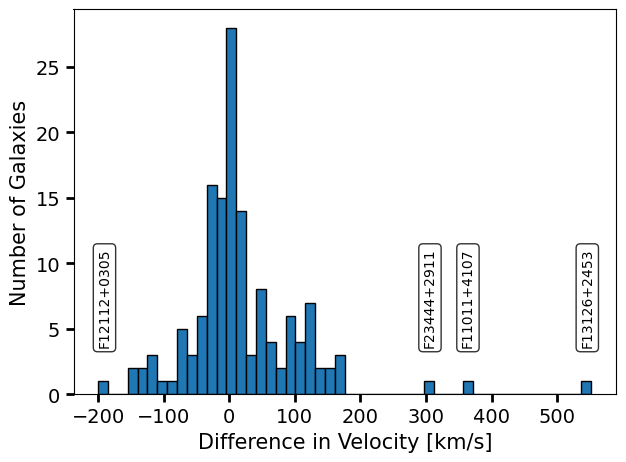

In [4]:
df2 = pd.read_csv(folder_path + 'KEEP_tab1.csv', header=None, skiprows = [27])
df2.columns = ['Name', 'RA', 'DEC', 'Velocity', '4']

# Filter out rows in df1 where cz == 0
mask = df1.cz != 0
filtered_df1 = df1[mask].reset_index(drop=True)

# Get the names of the remaining galaxies
remaining_names = set(filtered_df1['nan'])

# Filter df2 to keep only rows with names in remaining_names
filtered_df2 = df2[df2['Name'].isin(remaining_names)].reset_index(drop=True)


czVel = np.array(filtered_df1.cz)
radVel = np.array(filtered_df2.Velocity)

differenceVel = czVel - radVel

# Plot histogram of velocity differences
fig2, ax2 = plt.subplots(figsize=(7, 5))
ax2.hist(differenceVel, bins=50, edgecolor='black')
ax2.set_xlabel('Difference in Velocity [km/s]', fontsize=15)
ax2.set_ylabel('Number of Galaxies', fontsize=15)
ax2.tick_params(axis='both', which='both', length=6, width=2, labelsize=14)
ax2.text(0.96, 0.38, 'F13126+2453', transform=ax2.transAxes, rotation=90, 
         verticalalignment='top', horizontalalignment='right', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax2.text(0.74, 0.38, 'F11011+4107', transform=ax2.transAxes, rotation=90, 
         verticalalignment='top', horizontalalignment='right', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax2.text(0.67, 0.38, 'F23444+2911', transform=ax2.transAxes, rotation=90, 
         verticalalignment='top', horizontalalignment='right', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax2.text(0.07, 0.38, 'F12112+0305', transform=ax2.transAxes, rotation=90, 
         verticalalignment='top', horizontalalignment='right', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
         
names = filtered_df1['nan'].values

# Find and print top 3 largest positive velocity differences
for _ in range(3):
    idx = np.argmax(differenceVel)
    print(f'Galaxy: {names[idx]}')
    print(f'Difference: {differenceVel[idx]} km/s')
    print(f'Optical Velocity: {czVel[idx]} km/s')
    print(f'Radio Velocity: {radVel[idx]} km/s\n')
    
    # Remove this entry from all arrays
    differenceVel = np.delete(differenceVel, idx)
    czVel = np.delete(czVel, idx)
    radVel = np.delete(radVel, idx)
    names = np.delete(names, idx)

# Smallest (most negative) difference
idx = np.argmin(differenceVel)
print('Most Negative Difference:')
print(f'Galaxy: {names[idx]}')
print(f'Difference: {differenceVel[idx]} km/s')
print(f'Optical Velocity: {czVel[idx]} km/s')
print(f'Radio Velocity: {radVel[idx]} km/s')
